# Fetching Data

Fetch data from AWS cloud using s3 bucket and tranforming data into pandas data frame

Note: To install packages used, uncomment the %pip install lines

In [48]:

%pip install boto3
%pip install textblob
%pip install wordcloud
%pip install pyarrow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Connect to s3:

In [2]:
import boto3
import pandas as pd

s3 = boto3.client('s3')

C:\Users\Aayush Ladda\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
import configparser
import os

# Initialize the configuration parser
config = configparser.ConfigParser()

# Specify the path to your configuration file
config_file_path = 'aws_config.ini'

# Read the configuration file
config.read(config_file_path)

# Access AWS credentials
aws_region = config.get('aws', 'region')
aws_access_key_id = config.get('aws', 'access_key_id')
aws_secret_access_key = config.get('aws', 'secret_access_key')

# Set environment variables
os.environ["AWS_DEFAULT_REGION"] = aws_region
os.environ["AWS_ACCESS_KEY_ID"] = aws_access_key_id
os.environ["AWS_SECRET_ACCESS_KEY"] = aws_secret_access_key

# Now you can use AWS SDKs or libraries with the configured credentials . 


In [4]:

s3 = boto3.resource(
  service_name='s3',
  region_name= aws_region,
  aws_access_key_id=aws_access_key_id,
  aws_secret_access_key=aws_secret_access_key
)

In [5]:
 # Print out bucket names
for bucket in s3.buckets.all():
    print(bucket.name)


deprojectbucket1


In [6]:
#%pip install s3fs

In [7]:
for obj in s3.Bucket('deprojectbucket1').objects.all():
    print(obj)

s3.ObjectSummary(bucket_name='deprojectbucket1', key='GoogleGeminiAIRedditSearch.csv')
s3.ObjectSummary(bucket_name='deprojectbucket1', key='google_articles.csv')
s3.ObjectSummary(bucket_name='deprojectbucket1', key='tweets.txt')


In [8]:
# Load csv file directly into python
obj = s3.Bucket('deprojectbucket1').Object('GoogleGeminiAIRedditSearch.csv').get()
df_reddit = pd.read_csv(obj['Body'], index_col=0)

# Load csv file directly into python
obj = s3.Bucket('deprojectbucket1').Object('google_articles.csv').get()
df_newsarticles = pd.read_csv(obj['Body'], index_col=0)

# Initialize the S3 client
s3_client = boto3.client('s3')

# Specify the bucket name and file key
bucket_name = 'deprojectbucket1'
file_key = 'tweets.txt'

# Get the content of the .txt file from S3
response = s3_client.get_object(Bucket=bucket_name, Key=file_key)
df_tweets = response['Body'].read().decode('utf-8')

# Split the text data into lines
lines = df_tweets.split('\n')

# Remove empty lines
lines = [line for line in lines if line]

# Create a list to store data
data = []

# Iterate over lines to extract data
for i in range(0, len(lines), 4):
    timestamp = lines[i]
    tweet_content = lines[i + 1]
    tweet_time = lines[i + 2]
    user = lines[i + 3]

    # Append data to the list
    data.append([timestamp, tweet_content, tweet_time, user])

# Create a DataFrame
df_twt = pd.DataFrame(data, columns=['Timestamp', 'Tweet_Content', 'Tweet_Time', 'User'])


In [9]:
# Transformation: data cleaning by reseting index for the 2 misloaded 
df_reddit.reset_index(inplace=True)
df_newsarticles.reset_index(inplace=True)

In [10]:
#check information of files 

df_reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Content1  239 non-null    object
 1   Content   239 non-null    object
 2   Content2  239 non-null    object
 3   Content3  239 non-null    object
 4   Content4  239 non-null    object
 5   Content5  239 non-null    object
 6   Content6  239 non-null    object
 7   Content7  239 non-null    object
 8   Text      239 non-null    object
 9   _Text     239 non-null    object
 10  _Link     239 non-null    object
dtypes: object(11)
memory usage: 20.7+ KB


In [11]:
df_newsarticles.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   100 non-null    object
 1   URL     100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


In [12]:
df_twt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Timestamp      60 non-null     object
 1   Tweet_Content  60 non-null     object
 2   Tweet_Time     60 non-null     object
 3   User           60 non-null     object
dtypes: object(4)
memory usage: 2.0+ KB


Check dataframes:

In [13]:
df_reddit.head()

,Content1,Content,Content2,Content3,Content4,Content5,Content6,Content7,Text,_Text,_Link
0,r/poland,https://www.reddit.com/r/poland/,2 days ago,https://www.reddit.com/r/poland/comments/1ax4w...,Maria Skłodowska-Curie according to Google's G...,2.5K\n votes,258,comments,SEARCH RESULTS\n \n \n \n \n ...,Maria Skłodowska-Curie according to Google's G...,https://www.reddit.com/r/poland/comments/1ax4w...
1,r/ArtificialInteligence,https://www.reddit.com/r/ArtificialInteligence/,3 days ago,https://www.reddit.com/r/ArtificialInteligence...,Google Gemini AI-image generator refuses to ge...,489\n votes,423,comments,SEARCH RESULTS\n \n \n \n \n ...,Google Gemini AI-image generator refuses to ge...,https://www.reddit.com/r/ArtificialInteligence...
2,r/GoogleGeminiAI,https://www.reddit.com/r/GoogleGeminiAI/,3 days ago,https://www.reddit.com/r/GoogleGeminiAI/commen...,I use GoogleGeminiAI,0\n votes,0,comments,SEARCH RESULTS\n \n \n \n \n ...,I use GoogleGeminiAI,https://www.reddit.com/r/GoogleGeminiAI/commen...
3,r/MachineLearning,https://www.reddit.com/r/MachineLearning/,3 mo. ago,https://www.reddit.com/r/MachineLearning/comme...,[D] Is Google Gemini the real deal or a public...,103\n votes,77,comments,SEARCH RESULTS\n \n \n \n \n ...,[D] Is Google Gemini the real deal or a public...,https://www.reddit.com/r/MachineLearning/comme...
4,r/soccercirclejerk,https://www.reddit.com/r/soccercirclejerk/,1 day ago,https://www.reddit.com/r/soccercirclejerk/comm...,outjerked by woke google gemini ai,1.2K\n votes,30,comments,SEARCH RESULTS\n \n \n \n \n ...,outjerked by woke google gemini ai,https://www.reddit.com/r/soccercirclejerk/comm...


In [14]:
df_newsarticles.head()

,Title,URL
0,Google’s Sundar Pichai Calls Gemini Race Swap ...,https://biztoc.com/x/fb2a73ad6406394e
1,"Sundar Pichai Slams ""Completely Unacceptable"" ...",https://www.ndtv.com/world-news/sundar-pichai-...
2,Google CEO Slams 'Completely Unacceptable' Gem...,https://www.ibtimes.com/google-ceo-slams-compl...
3,Google CEO slams 'completely unacceptable' Gem...,https://www.france24.com/en/live-news/20240228...
4,Google CEO slams 'completely unacceptable' Gem...,https://consent.yahoo.com/v2/collectConsent?se...


In [15]:
df_twt.head()

,Timestamp,Tweet_Content,Tweet_Time,User
0,2024-02-28T233604.268331_639,This is a negative synthetic tweet about #goog...,2024-02-28T23:36:04.268331,user_614
1,2024-02-28T233604.268351_801,This is a neutral synthetic tweet about #googl...,2024-02-28T23:36:04.268351,user_924
2,2024-02-28T233604.268358_162,This is a neutral synthetic tweet about #googl...,2024-02-28T23:36:04.268358,user_209
3,2024-02-28T233604.268364_847,This is a neutral synthetic tweet about #googl...,2024-02-28T23:36:04.268364,user_883
4,2024-02-28T233604.268370_382,This is a positive synthetic tweet about #goog...,2024-02-28T23:36:04.268370,user_856


In [16]:
# Save the DataFrame to a CSV file
df_reddit.to_csv('reddit.csv', index=False)
df_newsarticles.to_csv('newsarticles.csv', index=False)
df_twt.to_csv('tweets.csv', index=False)

## MongoDB

Load data into MongoDB to perform basic data table transformtion, query for only the needed fields in each table

In [17]:
# %pip install pymongo

In [18]:
#%pip install --upgrade pymongo

In [19]:
# Connect to MongoDB client
from pymongo import MongoClient

client = MongoClient('mongodb://localhost:27017/')
db = client['sentimentdb']
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'sentimentdb')

In [20]:
# Insert a multiple documents/records into reddit collection
db['reddit'].drop()
collection = db['reddit'] # Use or create a collection named 'reddit' 
collection.insert_many(df_reddit.to_dict('records'))

InsertManyResult([ObjectId('65e5bbc4fa5eabd470a697c3'), ObjectId('65e5bbc4fa5eabd470a697c4'), ObjectId('65e5bbc4fa5eabd470a697c5'), ObjectId('65e5bbc4fa5eabd470a697c6'), ObjectId('65e5bbc4fa5eabd470a697c7'), ObjectId('65e5bbc4fa5eabd470a697c8'), ObjectId('65e5bbc4fa5eabd470a697c9'), ObjectId('65e5bbc4fa5eabd470a697ca'), ObjectId('65e5bbc4fa5eabd470a697cb'), ObjectId('65e5bbc4fa5eabd470a697cc'), ObjectId('65e5bbc4fa5eabd470a697cd'), ObjectId('65e5bbc4fa5eabd470a697ce'), ObjectId('65e5bbc4fa5eabd470a697cf'), ObjectId('65e5bbc4fa5eabd470a697d0'), ObjectId('65e5bbc4fa5eabd470a697d1'), ObjectId('65e5bbc4fa5eabd470a697d2'), ObjectId('65e5bbc4fa5eabd470a697d3'), ObjectId('65e5bbc4fa5eabd470a697d4'), ObjectId('65e5bbc4fa5eabd470a697d5'), ObjectId('65e5bbc4fa5eabd470a697d6'), ObjectId('65e5bbc4fa5eabd470a697d7'), ObjectId('65e5bbc4fa5eabd470a697d8'), ObjectId('65e5bbc4fa5eabd470a697d9'), ObjectId('65e5bbc4fa5eabd470a697da'), ObjectId('65e5bbc4fa5eabd470a697db'), ObjectId('65e5bbc4fa5eabd470a697

In [21]:
# Query for only the needed fields
query_results = collection.find({}, {"Content4": 1, "Content3": 1})
reddit_df = pd.DataFrame(list(query_results)) # save as dataframe
reddit_df

,_id,Content3,Content4
0,65e5bbc4fa5eabd470a697c3,https://www.reddit.com/r/poland/comments/1ax4w...,Maria Skłodowska-Curie according to Google's G...
1,65e5bbc4fa5eabd470a697c4,https://www.reddit.com/r/ArtificialInteligence...,Google Gemini AI-image generator refuses to ge...
2,65e5bbc4fa5eabd470a697c5,https://www.reddit.com/r/GoogleGeminiAI/commen...,I use GoogleGeminiAI
3,65e5bbc4fa5eabd470a697c6,https://www.reddit.com/r/MachineLearning/comme...,[D] Is Google Gemini the real deal or a public...
4,65e5bbc4fa5eabd470a697c7,https://www.reddit.com/r/soccercirclejerk/comm...,outjerked by woke google gemini ai
...,...,...,...
234,65e5bbc4fa5eabd470a698ad,https://www.reddit.com/r/ChatGPT/comments/14jj...,"""Google DeepMind’s CEO says its next algorithm..."
235,65e5bbc4fa5eabd470a698ae,https://www.reddit.com/r/google/comments/18cse...,Google's Gemini ♊
236,65e5bbc4fa5eabd470a698af,https://www.reddit.com/r/Udemies/comments/1arx...,Social Media Growth: Use ChatGPT and Google Ge...
237,65e5bbc4fa5eabd470a698b0,https://www.reddit.com/r/ChatGPT/comments/18da...,How to use Gemini AI by Google for Beginners


In [22]:
# Insert many records into newsarticles collection
# Drop the collection
db['newsarticles'].drop()
collection = db['newsarticles'] # Use or create a collection named 'newsarticles' 
collection.insert_many(df_newsarticles.to_dict('records'))

InsertManyResult([ObjectId('65e5bbc5fa5eabd470a698b2'), ObjectId('65e5bbc5fa5eabd470a698b3'), ObjectId('65e5bbc5fa5eabd470a698b4'), ObjectId('65e5bbc5fa5eabd470a698b5'), ObjectId('65e5bbc5fa5eabd470a698b6'), ObjectId('65e5bbc5fa5eabd470a698b7'), ObjectId('65e5bbc5fa5eabd470a698b8'), ObjectId('65e5bbc5fa5eabd470a698b9'), ObjectId('65e5bbc5fa5eabd470a698ba'), ObjectId('65e5bbc5fa5eabd470a698bb'), ObjectId('65e5bbc5fa5eabd470a698bc'), ObjectId('65e5bbc5fa5eabd470a698bd'), ObjectId('65e5bbc5fa5eabd470a698be'), ObjectId('65e5bbc5fa5eabd470a698bf'), ObjectId('65e5bbc5fa5eabd470a698c0'), ObjectId('65e5bbc5fa5eabd470a698c1'), ObjectId('65e5bbc5fa5eabd470a698c2'), ObjectId('65e5bbc5fa5eabd470a698c3'), ObjectId('65e5bbc5fa5eabd470a698c4'), ObjectId('65e5bbc5fa5eabd470a698c5'), ObjectId('65e5bbc5fa5eabd470a698c6'), ObjectId('65e5bbc5fa5eabd470a698c7'), ObjectId('65e5bbc5fa5eabd470a698c8'), ObjectId('65e5bbc5fa5eabd470a698c9'), ObjectId('65e5bbc5fa5eabd470a698ca'), ObjectId('65e5bbc5fa5eabd470a698

In [23]:
# Query for only the needed fields
query_results = collection.find({}, {"Title": 1, "URL": 1})
newsarticle_df = pd.DataFrame(list(query_results)) # Save as dataframe
newsarticle_df

,_id,Title,URL
0,65e5bbc5fa5eabd470a698b2,Google’s Sundar Pichai Calls Gemini Race Swap ...,https://biztoc.com/x/fb2a73ad6406394e
1,65e5bbc5fa5eabd470a698b3,"Sundar Pichai Slams ""Completely Unacceptable"" ...",https://www.ndtv.com/world-news/sundar-pichai-...
2,65e5bbc5fa5eabd470a698b4,Google CEO Slams 'Completely Unacceptable' Gem...,https://www.ibtimes.com/google-ceo-slams-compl...
3,65e5bbc5fa5eabd470a698b5,Google CEO slams 'completely unacceptable' Gem...,https://www.france24.com/en/live-news/20240228...
4,65e5bbc5fa5eabd470a698b6,Google CEO slams 'completely unacceptable' Gem...,https://consent.yahoo.com/v2/collectConsent?se...
...,...,...,...
95,65e5bbc5fa5eabd470a69911,Woman Reveals 'Unofficial Assistant' in High-F...,https://www.newsweek.com/google-search-work-ex...
96,65e5bbc5fa5eabd470a69912,ChatGPT Alternative by Google to Generate Natu...,https://www.ilovefreesoftware.com/27/webware/c...
97,65e5bbc5fa5eabd470a69913,FCC commissioner makes admission over politica...,https://biztoc.com/x/ca48ba4af3c81551
98,65e5bbc5fa5eabd470a69914,Google Gemini: a glimpse into our Orwellian fu...,https://freerepublic.com/focus/f-chat/4220378/...


In [24]:
# Insert many records into tweets collection
# Drop the collection
db['tweets'].drop()
collection = db['tweets'] # Use or create a collection named 'tweets' 
collection.insert_many(df_twt.to_dict('records'))

# Query for needed fields
query_results = collection.find({}, {"Tweet_Content": 1, "User": 1})
tweet_df = pd.DataFrame(list(query_results)) # Save as dataframe
tweet_df

,_id,Tweet_Content,User
0,65e5bbc5fa5eabd470a69916,This is a negative synthetic tweet about #goog...,user_614
1,65e5bbc5fa5eabd470a69917,This is a neutral synthetic tweet about #googl...,user_924
2,65e5bbc5fa5eabd470a69918,This is a neutral synthetic tweet about #googl...,user_209
3,65e5bbc5fa5eabd470a69919,This is a neutral synthetic tweet about #googl...,user_883
4,65e5bbc5fa5eabd470a6991a,This is a positive synthetic tweet about #goog...,user_856
5,65e5bbc5fa5eabd470a6991b,This is a neutral synthetic tweet about #googl...,user_396
6,65e5bbc5fa5eabd470a6991c,This is a negative synthetic tweet about #goog...,user_961
7,65e5bbc5fa5eabd470a6991d,This is a negative synthetic tweet about #goog...,user_997
8,65e5bbc5fa5eabd470a6991e,This is a neutral synthetic tweet about #googl...,user_789
9,65e5bbc5fa5eabd470a6991f,This is a positive synthetic tweet about #goog...,user_274


In [25]:
# Save to csv
reddit_df.to_csv('reddit_edit.csv', index=False)
newsarticle_df.to_csv('newsarticles_edit.csv', index=False)
tweet_df.to_csv('tweets_edit.csv', index=False)

## SQLite3

Load data into SQLite3 for data query and making a combined table

In [26]:
#%pip install pysqlite3

In [27]:
import sqlite3 # Import module

# Connect to Sqlite by creating a sentimentdb database
conn = sqlite3.connect('sentimentdb.db')
cur = conn.cursor()

# Retrieve a list of all tables in the database
cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
tables = cur.fetchall()

# Drop each table
for table in tables:
    cur.execute(f"DROP TABLE IF EXISTS {table[0]}")
conn.commit()

# Close the connection
conn.close()

In [28]:
# Load data from csv into pandas dataframe
reddit_df = pd.read_csv('reddit_edit.csv')
newsarticle_df = pd.read_csv('newsarticles_edit.csv')
tweet_df = pd.read_csv('tweets_edit.csv')

In [29]:
conn = sqlite3.connect('sentimentdb.db')

# Convert dataframes to sql files for query
reddit_df.to_sql('reddit', conn, if_exists='replace', index=False)
newsarticle_df.to_sql('newsarticle', conn, if_exists='replace', index=False)
tweet_df.to_sql('tweet', conn, if_exists='replace', index=False)

conn.close()

In [30]:
# Perform basic query to observe all fields in the reddit table 
conn = sqlite3.connect('sentimentdb.db')

query = "SELECT * FROM reddit;"
data = pd.read_sql_query(query, conn)
conn.close()

data

,_id,Content3,Content4
0,65e5bbc4fa5eabd470a697c3,https://www.reddit.com/r/poland/comments/1ax4w...,Maria Skłodowska-Curie according to Google's G...
1,65e5bbc4fa5eabd470a697c4,https://www.reddit.com/r/ArtificialInteligence...,Google Gemini AI-image generator refuses to ge...
2,65e5bbc4fa5eabd470a697c5,https://www.reddit.com/r/GoogleGeminiAI/commen...,I use GoogleGeminiAI
3,65e5bbc4fa5eabd470a697c6,https://www.reddit.com/r/MachineLearning/comme...,[D] Is Google Gemini the real deal or a public...
4,65e5bbc4fa5eabd470a697c7,https://www.reddit.com/r/soccercirclejerk/comm...,outjerked by woke google gemini ai
...,...,...,...
234,65e5bbc4fa5eabd470a698ad,https://www.reddit.com/r/ChatGPT/comments/14jj...,"""Google DeepMind’s CEO says its next algorithm..."
235,65e5bbc4fa5eabd470a698ae,https://www.reddit.com/r/google/comments/18cse...,Google's Gemini ♊
236,65e5bbc4fa5eabd470a698af,https://www.reddit.com/r/Udemies/comments/1arx...,Social Media Growth: Use ChatGPT and Google Ge...
237,65e5bbc4fa5eabd470a698b0,https://www.reddit.com/r/ChatGPT/comments/18da...,How to use Gemini AI by Google for Beginners


In [31]:
# Transform: renaming field names to prepare for data merger
reddit_df.rename(columns={'Content4': 'Content', 'Content3': 'Location'}, inplace=True)
newsarticle_df.rename(columns={'Title': 'Content', 'URL': 'Location'}, inplace=True)
tweet_df.rename(columns={'Tweet_Content': 'Content', 'User': 'Location'}, inplace=True)

In [32]:
sentiment_analysis_df = pd.concat([reddit_df, newsarticle_df, tweet_df])
sentiment_analysis_df.reset_index(inplace=True, drop=True)
sentiment_analysis_df

,_id,Location,Content
0,65e5bbc4fa5eabd470a697c3,https://www.reddit.com/r/poland/comments/1ax4w...,Maria Skłodowska-Curie according to Google's G...
1,65e5bbc4fa5eabd470a697c4,https://www.reddit.com/r/ArtificialInteligence...,Google Gemini AI-image generator refuses to ge...
2,65e5bbc4fa5eabd470a697c5,https://www.reddit.com/r/GoogleGeminiAI/commen...,I use GoogleGeminiAI
3,65e5bbc4fa5eabd470a697c6,https://www.reddit.com/r/MachineLearning/comme...,[D] Is Google Gemini the real deal or a public...
4,65e5bbc4fa5eabd470a697c7,https://www.reddit.com/r/soccercirclejerk/comm...,outjerked by woke google gemini ai
...,...,...,...
394,65e5bbc5fa5eabd470a6994d,user_345,This is a positive synthetic tweet about #goog...
395,65e5bbc5fa5eabd470a6994e,user_638,This is a negative synthetic tweet about #goog...
396,65e5bbc5fa5eabd470a6994f,user_657,This is a neutral synthetic tweet about #googl...
397,65e5bbc5fa5eabd470a69950,user_154,This is a negative synthetic tweet about #goog...


In [33]:
# Convert the combined file to sql
conn = sqlite3.connect('sentimentdb.db')

sentiment_analysis_df.to_sql('sentiment_analysis', conn, if_exists='replace', index=False)

conn.close()

In [34]:
#%pip install nltk

In [35]:
# Create a connection to the SQLite database
conn = sqlite3.connect('sentimentdb.db')

# Read data from the SQLite table into a DataFrame
sentiment_analysis_df = pd.read_sql_query("SELECT Content FROM sentiment_analysis;", conn)

# Close the connection
conn.close()

# Convert to csv
sentiment_analysis_df.reset_index(inplace=True, drop=True)
sentiment_analysis_df.to_csv('sentiment_analysis.csv', index=False)

In [36]:
sentiment_analysis_df

,Content
0,Maria Skłodowska-Curie according to Google's G...
1,Google Gemini AI-image generator refuses to ge...
2,I use GoogleGeminiAI
3,[D] Is Google Gemini the real deal or a public...
4,outjerked by woke google gemini ai
...,...
394,This is a positive synthetic tweet about #goog...
395,This is a negative synthetic tweet about #goog...
396,This is a neutral synthetic tweet about #googl...
397,This is a negative synthetic tweet about #goog...


In [40]:
import textblob
from textblob import TextBlob

# Assuming combined_df is your DataFrame with a 'Content' column
sentiment_analysis_df['Sentiment'] = sentiment_analysis_df['Content'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Function to classify sentiment
def classify_sentiment(sentiment):
    if sentiment > 0:
        return 'positive'
    elif sentiment < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment classification
sentiment_analysis_df['Sentiment_Class'] = sentiment_analysis_df['Sentiment'].apply(classify_sentiment)

# Print and save the results
print(sentiment_analysis_df[['Content', 'Sentiment_Class']])

                                               Content Sentiment_Class
0    Maria Skłodowska-Curie according to Google's G...         neutral
1    Google Gemini AI-image generator refuses to ge...        negative
2                                 I use GoogleGeminiAI         neutral
3    [D] Is Google Gemini the real deal or a public...        positive
4                   outjerked by woke google gemini ai         neutral
..                                                 ...             ...
394  This is a positive synthetic tweet about #goog...        positive
395  This is a negative synthetic tweet about #goog...        negative
396  This is a neutral synthetic tweet about #googl...         neutral
397  This is a negative synthetic tweet about #goog...        negative
398  This is a negative synthetic tweet about #goog...        negative

[399 rows x 2 columns]


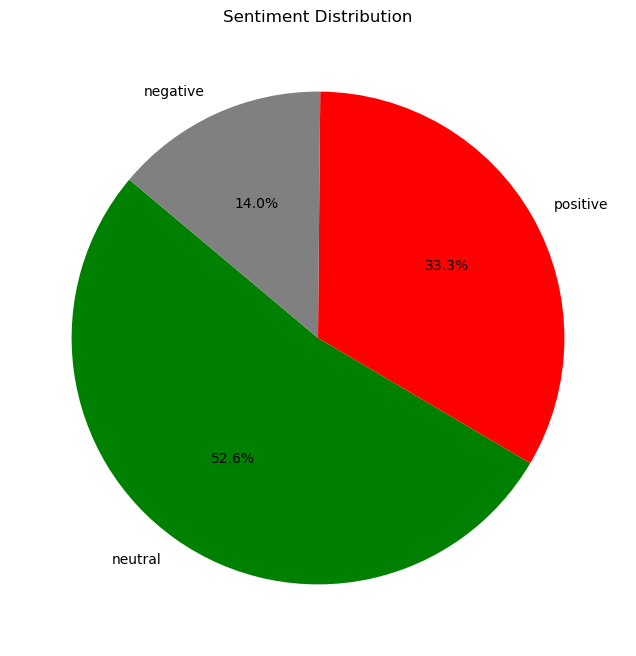

In [41]:
import matplotlib.pyplot as plt

# Assuming combined_df is your DataFrame with a 'Sentiment_Class' column
sentiment_counts = sentiment_analysis_df['Sentiment_Class'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['green', 'red', 'gray'])
plt.title('Sentiment Distribution')
plt.show()


In [42]:
import nltk

In [43]:
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to C:\Users\Aayush
[nltk_data]     Ladda\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

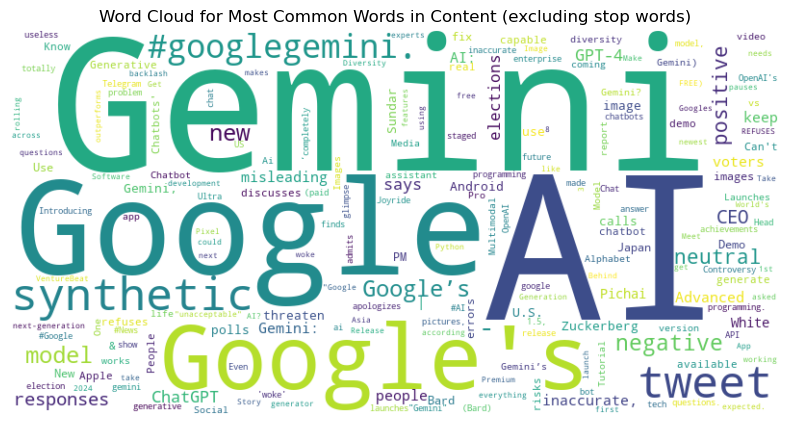

In [46]:
# Import modules
from wordcloud import WordCloud
from nltk.corpus import stopwords
from collections import Counter

# Assuming combined_df is your DataFrame with 'Content' column
# Check if there is content before proceeding
if not sentiment_analysis_df['Content'].empty:
    # Tokenize the words in the content
    words = ' '.join(sentiment_analysis_df['Content']).split()

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.lower() not in stop_words]

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(Counter(words))

    # Display the WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Most Common Words in Content (excluding stop words)')
    plt.show()
else:
    print("No content available to create a Word Cloud.")


In [47]:
# Check data
sentiment_analysis_df.head()

,Content,Sentiment,Sentiment_Class
0,Maria Skłodowska-Curie according to Google's G...,0.00,neutral
1,Google Gemini AI-image generator refuses to ge...,-0.25,negative
2,I use GoogleGeminiAI,0.00,neutral
3,[D] Is Google Gemini the real deal or a public...,0.20,positive
4,outjerked by woke google gemini ai,0.00,neutral


In [49]:
import pyarrow as pa
import pyarrow.parquet as pq

# Convert to csv
sentiment_analysis_df.to_csv('sentiment_analysis.csv', index=False)

# Convert DataFrame to Parquet
def convert_df_to_parquet(df, file_path):
    table = pa.Table.from_pandas(df)
    pq.write_table(table, file_path)

# Convert to parquet
convert_df_to_parquet(sentiment_analysis_df, 'sentiment_analysis.parquet')